In [11]:
'''
Esther Aruti
BME I5000: Medical Imaging and Signal Processing
October 8, 2024
Assignment #4: Counting Rice Kernels
'''

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage as ski
from scipy.optimize import fmin
import numpy as np
import skimage.filters
import skimage.measure


In [12]:
img = ski.io.imread('rice.png')
print(img.shape)

(256, 256)


In [13]:
def myplane(p, dims): # lecture slides
    [X, Y] = np.meshgrid(np.linspace(0, 1, dims[0]), np.linspace(0, 1, dims[1]))
    return p[0] + p[1]*X + p[2]*Y + p[3]*X**2 + p[4]*Y**2 + p[5]*X*Y # changed to parabola


def myerror(p,Z): # lecture Nick's code
    return np.sum(np.sum((Z-myplane(p,np.shape(Z)))**2))


def myplanefit(Z): # lecture slides
    poptimal = fmin(myerror, [np.mean(Z), 0, 0, 0, 0, 0], args=(Z,)) # changed to parabola
    return myplane(poptimal, np.shape(Z))


In [14]:
# detrend the image
detrended_img = img - myplanefit(img)

# thresholding using Otsu
binary_img = detrended_img > skimage.filters.threshold_otsu(detrended_img)

# Label connected components
label_img, num_labels = skimage.measure.label(binary_img, return_num=True)

# create kernel
kernel1 = ski.morphology.square(5)

# erosion
erosion = ski.morphology.erosion(label_img, kernel1)

# create kernel
kernel2 = ski.morphology.square(4)

# dilation
dilation = ski.morphology.dilation(erosion, kernel2)

# Calculate sizes (area) of each component
sizes = np.bincount(dilation.ravel())[1:]

C:\Users\esthe\AppData\Local\Temp\ipykernel_29820\2289858238.py:11: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  poptimal = fmin(myerror, [np.mean(Z), 0, 0, 0, 0, 0], args=(Z,)) # changed to parabola


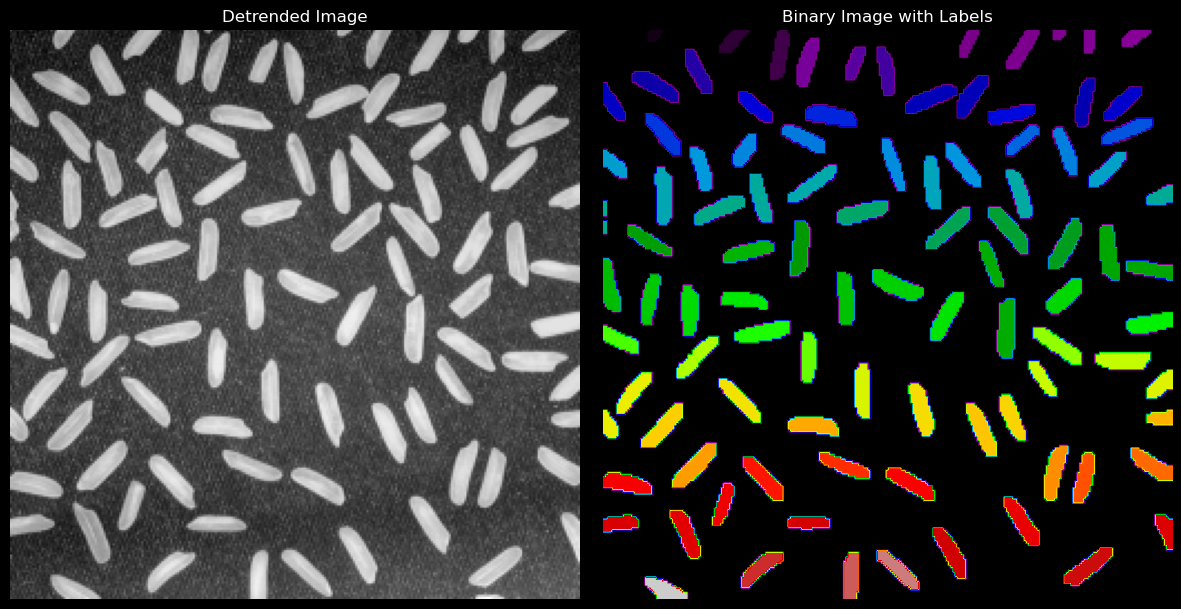

Rice Kernel 1: Size = 26 pixels
Rice Kernel 11: Size = 89 pixels
Rice Kernel 21: Size = 110 pixels
Rice Kernel 31: Size = 131 pixels
Rice Kernel 41: Size = 140 pixels
Rice Kernel 51: Size = 146 pixels
Rice Kernel 61: Size = 154 pixels
Rice Kernel 71: Size = 166 pixels
Rice Kernel 81: Size = 171 pixels
Rice Kernel 91: Size = 206 pixels


In [15]:
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Detrended Image')
plt.imshow(detrended_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Binary Image with Labels')
plt.imshow(dilation, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

# remove size 0
sizes = [size for size in sizes if size != 0]

# remove largest 3
sizes = sorted(sizes)[:-3] 

# Print the sizes of the rice kernels
for i, size in enumerate(sizes[::10]):
    print(f"Rice Kernel {i*10 + 1}: Size = {size} pixels")

In [16]:
# print # of rice kernels
print("Number of Rice Kernels: ", len(sizes))

# get the average size
print("Average Rice Kernel Size: ", np.mean(sizes))

print("Max Rice Kernel Size: ", np.max(sizes))
print("Min Rice Kernel Size: ", np.min(sizes))

# get the standard deviation
print("Standard Deviation of Rice Kernel Size: ", np.std(sizes))

Number of Rice Kernels:  91
Average Rice Kernel Size:  135.71428571428572
Max Rice Kernel Size:  206
Min Rice Kernel Size:  26
Standard Deviation of Rice Kernel Size:  36.0559046129317
